<a href="https://colab.research.google.com/github/FucsikovaTereza/Research_Project/blob/main/MediaPipe_Pose_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/FucsikovaTereza/Research_Project
!pip install mediapipe
import cv2
import mediapipe as mp
import math
import csv
import os
import datetime
import sys
sys.path.append('/content/Research_Project')
from MediaPipe_class import MediaPipe_PoseEstimation

Cloning into 'Research_Project'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 78 (delta 0), reused 1 (delta 0), pack-reused 75
Receiving objects: 100% (78/78), 241.12 MiB | 30.07 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [6]:
!unzip /content/Research_Project/test_videos.zip
!rm /content/Research_Project/test_videos.zip

Archive:  /content/Research_Project/test_videos.zip
   creating: test_videos/horizontal/
  inflating: test_videos/horizontal/2022-11-14 09-26-55-1.mkv  
  inflating: test_videos/horizontal/2022-11-14 09-26-55-2.mkv  
   creating: test_videos/vertical/
  inflating: test_videos/vertical/2022-11-14 09-23-11-1.mkv  
  inflating: test_videos/vertical/2022-11-14 09-23-12-2.mkv  


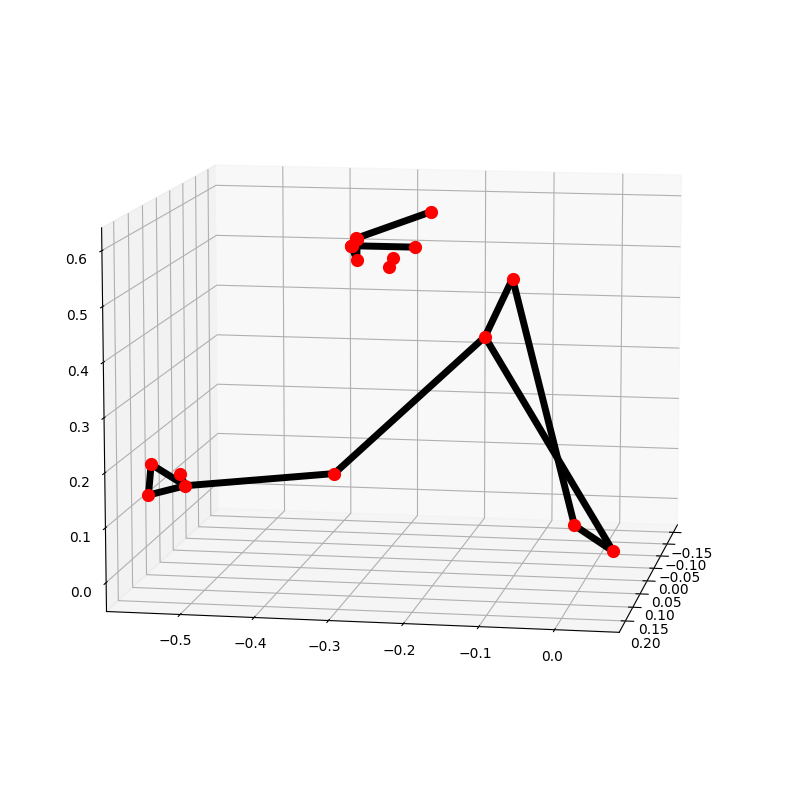

Null.Frames


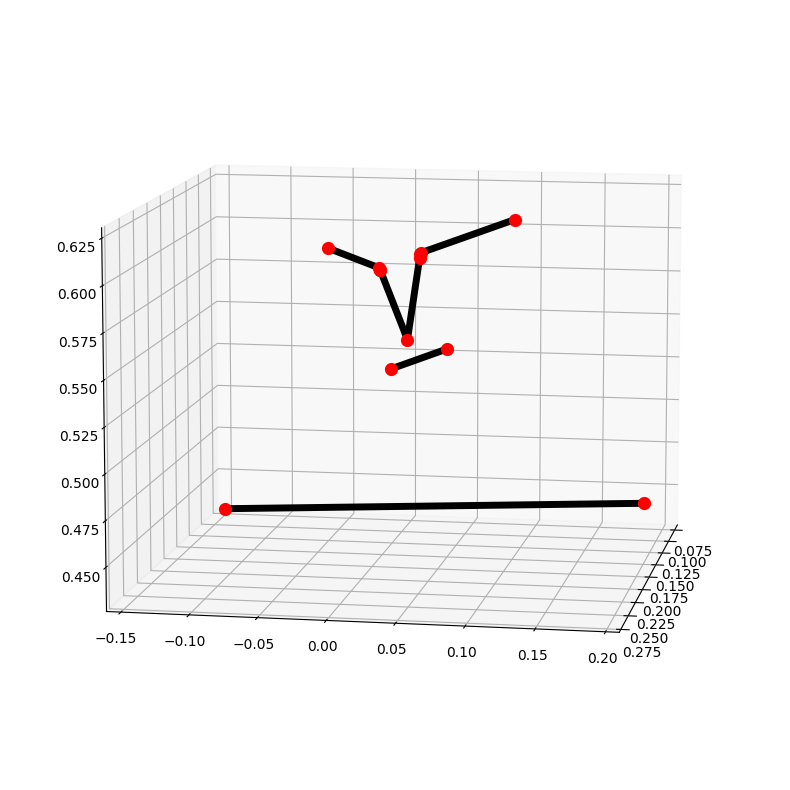

Null.Frames


In [12]:
# Set input type
input_type = 'file'     #file/folder (input type)
side = 'left'           #left/right (according to the closer shoulder to camera from person on video perspective)
view = 'front'          #front/side (according to internal or external camera selection)

if input_type == 'file':
    # SET AN INPUT FILE in the folder cropped_videos
    input_file = 'test_videos/horizontal/2022-11-14 09-26-55-1.mkv'
    csv_file_name = f'{os.path.splitext(input_file)[0]}.csv'
    output_video_name = f'{os.path.splitext(input_file)[0]}_output.mp4'

    # Create 'statistics' folder if it doesn't exist
    statistics_folder = 'statistics'
    os.makedirs(statistics_folder, exist_ok=True)

    # Set the paths for csv file and output video in the 'statistics' folder
    csv_file_path = os.path.join(statistics_folder, os.path.basename(csv_file_name))
    output_video_path = os.path.join(statistics_folder, os.path.basename(output_video_name))

    video_processor = MediaPipe_PoseEstimation(input_file, csv_file_path, output_video_path, view, side)
    video_processor.process_video()

elif input_type == 'folder':
    input_folder = 'test_videos/horizontal'
    output_folder_videos = 'result_videos'
    output_folder_csv = 'result_statistics'

    # Create output folders if they don't exist
    os.makedirs(output_folder_videos, exist_ok=True)
    os.makedirs(output_folder_csv, exist_ok=True)

    # Iterate through files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".mkv"):
            # Set output file names
            csv_file_name = f'{os.path.splitext(filename)[0]}.csv'
            output_video_name = f'{os.path.splitext(filename)[0]}_output.mp4'
            csv_file_path = os.path.join(output_folder_csv, csv_file_name)
            output_video_path = os.path.join(output_folder_videos, output_video_name)
            file_path = os.path.join(input_folder, filename)

            video_processor = MediaPipe_PoseEstimation(file_path, csv_file_path, output_video_path, view, side)
            video_processor.process_video()
else:
    print("You have just two options: 'file' or 'folder'")